# PROBLEM STATEMENT:
<h1>Supplement Sales Prediction</h1>

Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("TRAIN.csv")
test = pd.read_csv("TEST_FINAL.csv")

In [3]:
print(train.shape)
print(test.shape)

(188340, 10)
(22265, 8)


In [4]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [6]:
train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [7]:
print(train.columns)
print(test.columns)

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')
Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')


# Here we have extra column #Order in train but not in test.

# Checking Misssing Values

In [8]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [9]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

<h4> Here we dont have any null value </h4>

# Now Check Caegorical and Numerical Features

In [10]:
col=train.columns
catagorical=[]
numerical=[]
for i in col:
    if train[i].dtypes=='object':
        catagorical.append(i)
    elif train[i].dtypes=='int64' or train[i].dtypes=='float64':
        numerical.append(i)
print("Categorical Features in Train Set:",catagorical)
print("Numerical Features in Train Set:",numerical)


Categorical Features in Train Set: ['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Discount']
Numerical Features in Train Set: ['Store_id', 'Holiday', '#Order', 'Sales']


In [11]:
col=test.columns
catagorical1=[]
numerical1=[]
for i in col:
    if test[i].dtypes=='object':
        catagorical1.append(i)
    elif test[i].dtypes=='int64' or test[i].dtypes=='float64':
        numerical1.append(i)
print("Categorical Features in Test Set:",catagorical1)
print("Numerical Features in Test Set:",numerical1)

Categorical Features in Test Set: ['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Discount']
Numerical Features in Test Set: ['Store_id', 'Holiday']


# Changing Categorical data into numerical

In [12]:
train['ID'].value_counts()

T1156772    1
T1188003    1
T1012964    1
T1174178    1
T1047682    1
           ..
T1185212    1
T1080114    1
T1047147    1
T1093854    1
T1007653    1
Name: ID, Length: 188340, dtype: int64

In [13]:
train['ID'] = train.ID.str.replace('T','').astype('int64')

In [14]:
train['ID'].dtypes

dtype('int64')

In [15]:
test['ID'].value_counts()

T1196909    1
T1204496    1
T1192495    1
T1210213    1
T1199104    1
           ..
T1194565    1
T1194735    1
T1204987    1
T1191105    1
T1190417    1
Name: ID, Length: 22265, dtype: int64

In [16]:
test['ID'] = test.ID.str.replace('T','').astype('int64')

In [17]:
test['ID'].dtypes

dtype('int64')

In [18]:
train['Store_Type'].value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [19]:
train['Store_Type']=train.Store_Type.str.replace('S','').astype('int64')

In [20]:
train['Store_Type'].dtypes

dtype('int64')

In [21]:
test['Store_Type'].value_counts()

S1    10492
S4     5429
S2     3416
S3     2928
Name: Store_Type, dtype: int64

In [22]:
test['Store_Type']=test.Store_Type.str.replace('S','').astype('int64')

In [23]:
test['Store_Type'].dtypes

dtype('int64')

In [24]:
train['Location_Type'].value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [25]:
train['Location_Type']=train.Location_Type.str.replace('L','').astype('int64')

In [26]:
train['Location_Type'].dtypes

dtype('int64')

In [27]:
test['Location_Type'].value_counts()

L1    10065
L2     5734
L3     3538
L5     1647
L4     1281
Name: Location_Type, dtype: int64

In [28]:
test['Location_Type']=test.Location_Type.str.replace('L','').astype('int64')

In [29]:
test['Location_Type'].dtypes

dtype('int64')

In [30]:
train['Region_Code'].value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [31]:
train['Region_Code']=train.Region_Code.str.replace('R','').astype('int64')

In [32]:
train['Region_Code'].dtypes

dtype('int64')

In [33]:
test['Region_Code']=test.Region_Code.str.replace('R','').astype('int64')

In [34]:
test['Region_Code'].dtypes

dtype('int64')

In [35]:
train['Date'].unique

<bound method Series.unique of 0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
188335    2019-05-31
188336    2019-05-31
188337    2019-05-31
188338    2019-05-31
188339    2019-05-31
Name: Date, Length: 188340, dtype: object>

# Converting date to Pandas datetime format

In [36]:

train['Date'] = pd.to_datetime(train['Date'])

In [37]:
test['Date']=pd.to_datetime(test['Date'])

In [38]:
train['Date'].dtypes

dtype('<M8[ns]')

In [39]:
train['Discount'].value_counts()

No     104051
Yes     84289
Name: Discount, dtype: int64

In [40]:
train.loc[train['Discount']=='No','Discount']=0
train.loc[train['Discount']=='Yes','Discount']=1

In [41]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,1000001,1,1,3,1,2018-01-01,1,1,9,7011.84
1,1000002,253,4,2,1,2018-01-01,1,1,60,51789.12
2,1000003,252,3,2,1,2018-01-01,1,1,42,36868.20
3,1000004,251,2,3,1,2018-01-01,1,1,23,19715.16
4,1000005,250,2,3,4,2018-01-01,1,1,62,45614.52


In [42]:
test.loc[test['Discount']=='No','Discount']=0
test.loc[test['Discount']=='Yes','Discount']=1

In [43]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,1188341,171,4,2,3,2019-06-01,0,0
1,1188342,172,1,1,1,2019-06-01,0,0
2,1188343,173,4,2,1,2019-06-01,0,0
3,1188344,174,1,1,4,2019-06-01,0,0
4,1188345,170,1,1,2,2019-06-01,0,0


In [44]:
train['Discount']=train.Discount.astype('int64')
test['Discount']=test.Discount.astype('int64')

In [45]:
train['Date'].tail()

188335   2019-05-31
188336   2019-05-31
188337   2019-05-31
188338   2019-05-31
188339   2019-05-31
Name: Date, dtype: datetime64[ns]

# Creating new feaures for day, month, WeekOfYear and Quarter

In [46]:
day=train["Date"].dt.day
month=train["Date"].dt.month

In [47]:
DF_date=pd.DataFrame({'day':day,'month':month})

In [48]:
train=pd.concat([train,DF_date],axis=1)

In [49]:
train['WeekOfYear'] = train['Date'].dt.week
train['WeekOfYear']=train.WeekOfYear.astype('int64')
#do same for test

In [50]:
train.drop(["Date"],axis=1,inplace=True)

In [51]:
train

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,day,month,WeekOfYear
0,1000001,1,1,3,1,1,1,9,7011.84,1,1,1
1,1000002,253,4,2,1,1,1,60,51789.12,1,1,1
2,1000003,252,3,2,1,1,1,42,36868.20,1,1,1
3,1000004,251,2,3,1,1,1,23,19715.16,1,1,1
4,1000005,250,2,3,4,1,1,62,45614.52,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
188335,1188336,149,2,3,2,1,1,51,37272.00,31,5,22
188336,1188337,153,4,2,1,1,0,90,54572.64,31,5,22
188337,1188338,154,1,3,2,1,0,56,31624.56,31,5,22
188338,1188339,155,3,1,2,1,1,70,49162.41,31,5,22


In [52]:
day1=test["Date"].dt.day
month1=test["Date"].dt.month
DF_date1=pd.DataFrame({'day':day1,'month':month1})
test=pd.concat([test,DF_date1],axis=1)

In [53]:
test['WeekOfYear'] = test['Date'].dt.week
test['WeekOfYear']=test.WeekOfYear.astype('int64')

In [54]:
test.drop(['Date'],axis=1,inplace=True)

In [55]:
test

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,day,month,WeekOfYear
0,1188341,171,4,2,3,0,0,1,6,22
1,1188342,172,1,1,1,0,0,1,6,22
2,1188343,173,4,2,1,0,0,1,6,22
3,1188344,174,1,1,4,0,0,1,6,22
4,1188345,170,1,1,2,0,0,1,6,22
...,...,...,...,...,...,...,...,...,...,...
22260,1210601,186,2,5,2,0,0,31,7,31
22261,1210602,11,4,2,1,0,0,31,7,31
22262,1210603,185,1,1,3,0,1,31,7,31
22263,1210604,69,1,1,4,0,0,31,7,31


In [56]:
Quarter=[]
for i in range(train.shape[0]):
    if train['month'][i] in [1,2,3]:
        Quarter.append(1)
    elif train['month'][i] in [4,5,6]:
        Quarter.append(2)
    elif train['month'][i] in [7,8,9]:
        Quarter.append(3)
    elif  train['month'][i] in [10,11,12]:
        Quarter.append(4)
len(Quarter)

188340

In [57]:
DF_quart=pd.DataFrame({'Quarter':Quarter})
train=pd.concat([train,DF_quart],axis=1)

In [58]:
train.head(2)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,day,month,WeekOfYear,Quarter
0,1000001,1,1,3,1,1,1,9,7011.84,1,1,1,1
1,1000002,253,4,2,1,1,1,60,51789.12,1,1,1,1


In [59]:
Quarter1=[]
for i in range(test.shape[0]):
    if test['month'][i] in [1,2,3]:
        Quarter1.append(1)
    elif test['month'][i] in [4,5,6]:
        Quarter1.append(2)
    elif test['month'][i] in [7,8,9]:
        Quarter1.append(3)
    elif  test['month'][i] in [10,11,12]:
        Quarter1.append(4)
len(Quarter1)

22265

In [60]:
DF_quart1=pd.DataFrame({'Quarter':Quarter1})
test=pd.concat([test,DF_quart1],axis=1)

In [61]:
test.head(2)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,day,month,WeekOfYear,Quarter
0,1188341,171,4,2,3,0,0,1,6,22,2
1,1188342,172,1,1,1,0,0,1,6,22,2


In [62]:
train['Quarter'].dtypes

dtype('int64')

# Let's visualize the data 

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

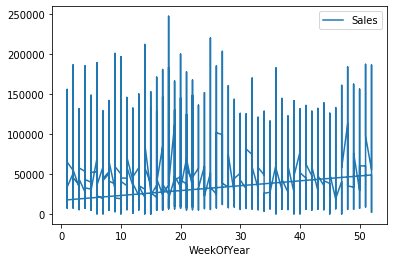

In [64]:
# day vs Sales
train.plot.line(x='WeekOfYear', y='Sales')

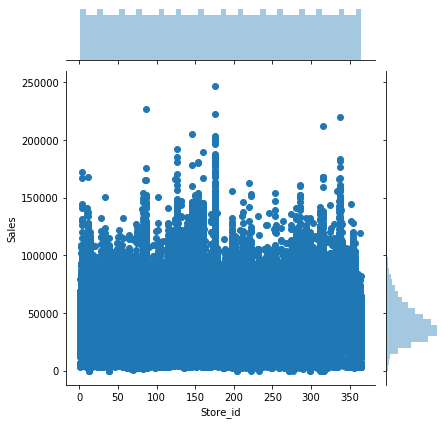

In [65]:
sns.jointplot('Store_id','Sales',train)

# Feature Selection (forward selection)

In [66]:
#checking correlation with every feature
train.corr()['Sales']

ID               0.005269
Store_id         0.004377
Store_Type       0.492471
Location_Type   -0.283771
Region_Code     -0.121003
Holiday         -0.154779
Discount         0.323906
#Order           0.941601
Sales            1.000000
day             -0.038969
month           -0.018092
WeekOfYear      -0.025094
Quarter         -0.018504
Name: Sales, dtype: float64

In [67]:
x=train.drop(columns = ['Sales','#Order','ID'], axis=1)
y=train['Sales']
test.drop(['ID'],axis=1,inplace=True)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=60)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(131838, 10)
(56502, 10)
(131838,)
(56502,)


In [71]:
import xgboost as xgb

In [72]:
xg_reg = xgb.XGBRegressor(colsample_bytree = 0.47, learning_rate = 0.27,
                max_depth =10, alpha = 30, n_estimators =253,n_jobs=20)

In [73]:
xg_reg.fit(x_train,y_train)

XGBRegressor(alpha=30, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.47, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.27, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=253, n_jobs=20, num_parallel_tree=1, random_state=0,
             reg_alpha=30, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
pred2= xg_reg.predict(x_test)

In [75]:
from sklearn.metrics import r2_score,mean_squared_error

In [76]:
r2_score(pred2,y_test)
#Accuracy

0.771145974781837

In [77]:
MSE= mean_squared_error(y_test,pred2)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 8041.262585331549


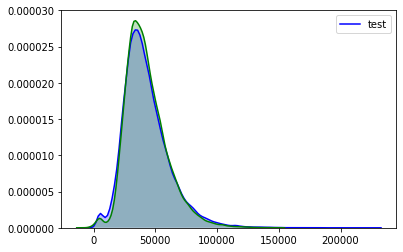

In [78]:
sns.kdeplot(y_test,color='b',shade=True,Label='test')
sns.kdeplot(pred2,color='g',shade=True,Label='pred')

# Creating Submisson File

In [79]:
xgb_pred=xg_reg.predict(test)

In [80]:
# create sample submission file and submit
predict1=pd.DataFrame(xgb_pred)
sub_df1=pd.read_csv('SAMPLE.csv')
dataset1=pd.concat([sub_df1['ID'],predict1],axis=1)
dataset1.columns=['ID','Sales']
dataset1.to_csv('xgb2_week_submission.csv',index=False)

<h1 style="color:blue"><u><i>Thank You</i></u></h1>

In [81]:
#from sklearn.ensemble import RandomForestRegressor

In [82]:
#regr = RandomForestRegressor(n_estimators=150,max_depth=23, random_state=50)

In [83]:
#regr.fit(x_train, y_train)

In [84]:
#pred1=regr.predict(x_test)

In [85]:
#r2_score(pred1,y_test)

In [86]:
#rf_pred=regr.predict(test)

In [87]:
# create sample submission file and submit
'''predic=pd.DataFrame(rf_pred)
sub_df=pd.read_csv('SAMPLE.csv')
datasets=pd.concat([sub_df['ID'],predic],axis=1)
datasets.columns=['ID','Sales']
datasets.to_csv('rf1_submission.csv',index=False)
'''

"predic=pd.DataFrame(rf_pred)\nsub_df=pd.read_csv('SAMPLE.csv')\ndatasets=pd.concat([sub_df['ID'],predic],axis=1)\ndatasets.columns=['ID','Sales']\ndatasets.to_csv('rf1_submission.csv',index=False)\n"